In [1]:
import time, joblib, os
import numpy as np
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from utils.dataset import load_dataset

In [2]:
data_root_path = 'data'+os.sep
data_paths = os.listdir('data')
start_time = time.strftime('%Y%m%d-%H%M%S', time.localtime(time.time()))

In [3]:
feature_data, target_data = load_dataset()  # create feature data
print('feature data length: ', feature_data.shape[0], ',', 'types of data: ', feature_data.shape[1])

feature data length:  43475 , types of data:  5


In [4]:
train_input, valid_input, train_output, valid_output = train_test_split(feature_data, target_data, test_size=0.2, random_state=0)
# valid_input, test_input, valid_output, test_output = train_test_split(valid_input, valid_output, test_size=0.5, random_state=0)

In [5]:
objective = 'regression'
depth = 15
leaves = 2**depth
lr = 0.01
n_estimators = 10000
boosting_type = 'gbdt'
max_bin = 255
n_leaf = 31

depth_list = list(range(1, 15, 1))
leaves_list = list(range(2, 100, 1))

In [6]:
est_flow_model = lgb.LGBMRegressor(objective=objective, n_estimators=n_estimators, learning_rate=lr, boosting_type=boosting_type, max_depth=-1, num_leaves=100)

est_flow_model.fit(X=train_input, y=train_output)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1038
[LightGBM] [Info] Number of data points in the train set: 34780, number of used features: 5
[LightGBM] [Info] Start training from score 650.651991


LGBMRegressor(learning_rate=0.01, n_estimators=10000, num_leaves=100,
              objective='regression')

The mae of prediction is: 48.814287147727704


['saved_model\\model.pkl']

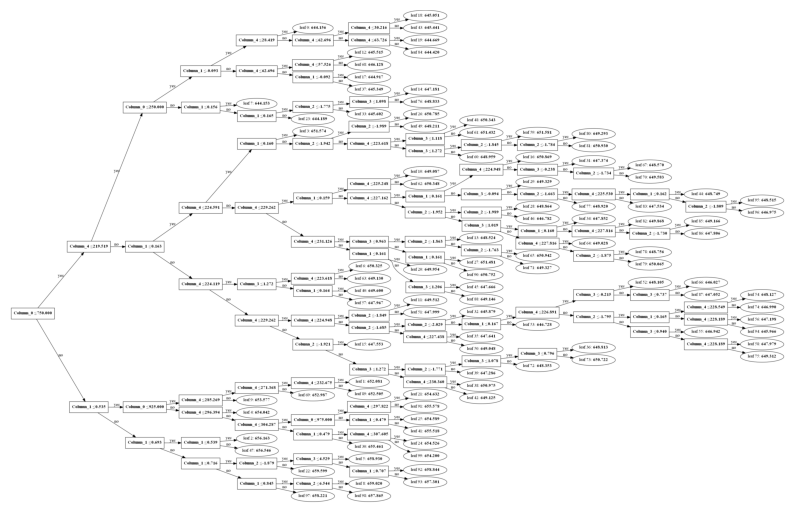

In [8]:
pred_output = est_flow_model.predict(valid_input, num_iteration=est_flow_model._best_iteration)
print('The mae of prediction is:', mean_absolute_error(valid_output, pred_output), end='\n\n')

pred_result = np.vstack((valid_output, pred_output)).T
np.savetxt('result' + os.sep + 'result.csv', pred_result, delimiter=",")

lgb.plot_tree(est_flow_model, figsize=(10,10))
lgb.create_tree_digraph(est_flow_model).render('display_graph' + os.sep + 'model' + '.gv', format='jpg', view=False)

# save model
joblib.dump(est_flow_model, 'saved_model' + os.sep + 'model' + '.pkl')
